In [503]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [504]:
def f(x, y, sigma_sqr, x_bar, y_bar):
    return 1/(2*np.pi*sigma_sqr) * np.exp(-((x - x_bar)**2 + (y - y_bar)**2)/(2*sigma_sqr))

def landing_point(x1, z1, ux, vt):
    m = vt/ux
    return x1 - (z1/m)

AIR_VISCOSITY = 0.000018325
AIR_DENSITY = 1.293
GRAVITY = 9.81

def part_fall_time(particle_ht, layer, ashdiam, part_density):
    hz = particle_ht # height of particle above sea level
    particle_fall_time = 0.0
    
    # rho is the density of air (kg/m^3) at the elevation of the current particle
    rho = AIR_DENSITY * np.exp(-hz/8200.0) 
    
    #  (friction due to the air) :
    #  vtl is terminal velocity (m/s) in laminar regime RE<6
    #  vti is terminal velocity (m/s) in intermediate regime 6<RE<500
    #  vtt is terminal velocity (m/s) in turbulent regime RE>500
    
    vtl = part_density * GRAVITY * ashdiam * ashdiam / (AIR_VISCOSITY * 18.0)
    
    reynolds_number = ashdiam * rho * vtl / AIR_VISCOSITY
    particle_term_vel = vtl
    temp0 = ashdiam * rho
    
    if reynolds_number >= 6.0:
        temp1 = 4.0 * GRAVITY * GRAVITY * part_density * part_density / (AIR_VISCOSITY * 225.0 * rho)
        vti = ashdiam * (temp1 ** (1./3.)) 
        reynolds_number = temp0 * vti / AIR_VISCOSITY
        particle_term_vel = vti

    # c...if intermediate RE>500 (turbulent regime), RE is calculated again considering vtt

    if reynolds_number >= 500.0:
        vtt = np.sqrt( 3.1 * part_density * GRAVITY * ashdiam / rho)
        reynolds_number =  temp0 * vtt / AIR_VISCOSITY
        particle_term_vel = vtt
    
    particle_fall_time = layer / particle_term_vel
    return (particle_fall_time, particle_term_vel)

print(part_fall_time(20000, 20000, 0.001, 1000))

(2130.201687720901, 9.388782346425593)


## Unit tests

Grain size: 1 mm (around 0 phi). 

$\sigma^2$: 1e9m$^2$ (from Bonadonna et al. (2005) Fig 2)

Suspended Mass ($q_{T}$): 1e10 kg

Terminal Velocity ($v$): 9.4 m/s

Wind speed ($u$) = 20 m/s

### Test 1

Single release point at ($z_k$): 20km

Single sampling point at $x_i = \bar{x_k}$

In [505]:
s_sqr = 1e9
v = -9.4
u = 20
q = 1e10
z = 20000

In [506]:
x_bar = landing_point(0, z, u, v)
print(x_bar)

42553.1914893617


In [507]:
x = x_bar
a = f(x, 0, s_sqr, x_bar, 0)
m = q * a
print("x = %e m"%x)
print("a = %e"%a)
print("m = %f kg"%m)

x = 4.255319e+04 m
a = 1.591549e-10
m = 1.591549 kg


<IPython.core.display.Javascript object>


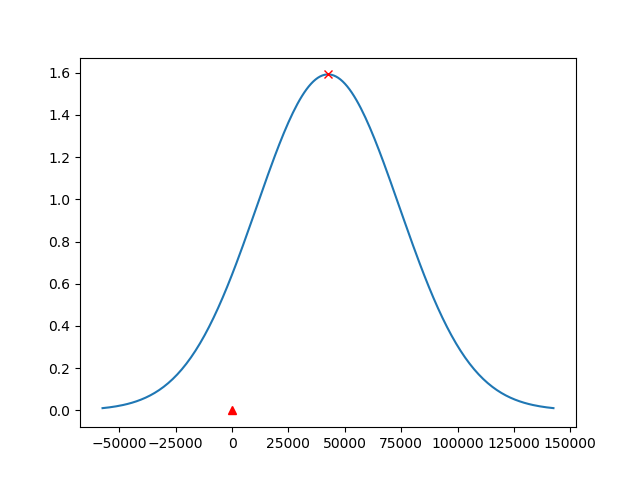

In [508]:
x_points = np.linspace(x_bar - 100000, x_bar + 100000, 200)
masses = q * f(x_points, 0, s_sqr, x_bar, 0)

plt.figure()
plt.plot(x_points, masses)

plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [510]:
q_inv = m/a
print(q_inv)
print(q == q_inv)

10000000000.0
True


### Test 2

Single release point at ($z_k$): 20km

Single sampling point at $x_i = \bar{x_k} + 50$km

In [511]:
x = x_bar + 50000
a = f(x, 0, s_sqr, x_bar, 0)
m = q * a
print("x = %e m"%x)
print("a = %e"%a)
print("m = %f kg"%m)

x = 9.255319e+04 m
a = 4.559865e-11
m = 0.455987 kg


<IPython.core.display.Javascript object>


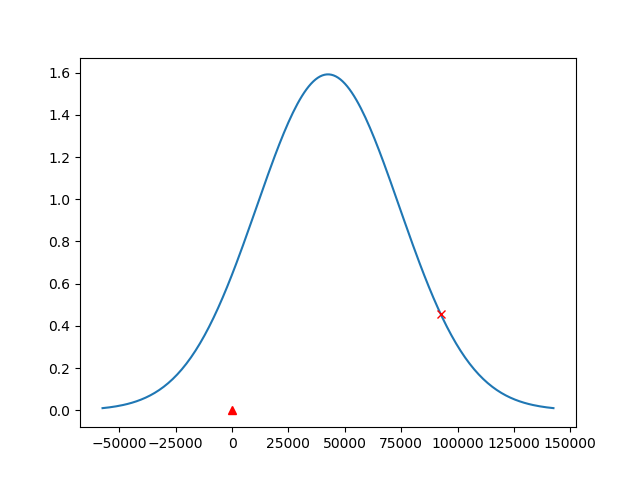

In [513]:
x_points = np.linspace(x_bar - 100000, x_bar + 100000, 200)
masses = q * f(x_points, 0, s_sqr, x_bar, 0)
plt.figure()
plt.plot(x_points, masses)

# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [514]:
q_inv = m/a
print(q_inv)
print(q == q_inv)

10000000000.0
True


### Test 3

Two release points at ($z_1, z_2$) = (15, 25) km

With ($q_1, q_2$) = (5e9, 5e9) kg

Two sampling points at $(x_1, x_2) = (\bar{x_1}, \bar{x_2})  $

In [515]:
z = [15000, 25000]
q = [5e9, 5e9]

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[31914.893617021276, 53191.48936170212]


In [516]:
x = x_bar

a = np.zeros((2,2))
print(a)
for i in range(2):
    for k in range(2):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[[0. 0.]
 [0. 0.]]
[[1.59154943e-10 1.26916761e-10]
 [1.26916761e-10 1.59154943e-10]]
[1.43035852 1.43035852]


<IPython.core.display.Javascript object>


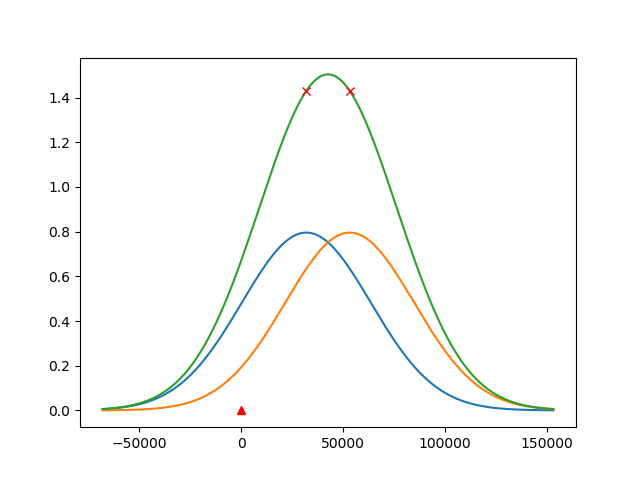

In [517]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for i in range(2):
    for k in range(2):
        mass = q[k] * f(x_points, 0, s_sqr, x_bar[i], 0)
    masses.append(mass)
plt.plot(x_points, masses[0])
plt.plot(x_points, masses[1])

mass_tot = masses[0] + masses[1]
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [518]:
q_inv = np.linalg.solve(a, m)
res = abs(q - q_inv)
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])

,Input Mass,Inverted Mass,Residual
0,5.000000e+09,5.000000e+09,9.536743e-07
1,5.000000e+09,5.000000e+09,1.907349e-06


### Test 3

Two release points at ($z_1, z_2$) = (15, 25) km

With ($q_1, q_2$) = (5e9, 5e9) kg

Two sampling points at $(x_1, x_2) = (\bar{x_1} + 10000, \bar{x_2} + 10000)  $

In [619]:
z = [15000, 25000]
q = [5e9, 5e9]

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[31914.893617021276, 53191.48936170212]


In [620]:
x = [xb + 10000 for xb in x_bar]
print(x)
a = np.zeros((2,2))
for i in range(2):
    for k in range(2):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[41914.89361702128, 63191.48936170212]
[[1.51392865e-10 1.49350726e-10]
 [9.75890693e-11 1.51392865e-10]]
[1.50371796 1.24490967]


<IPython.core.display.Javascript object>


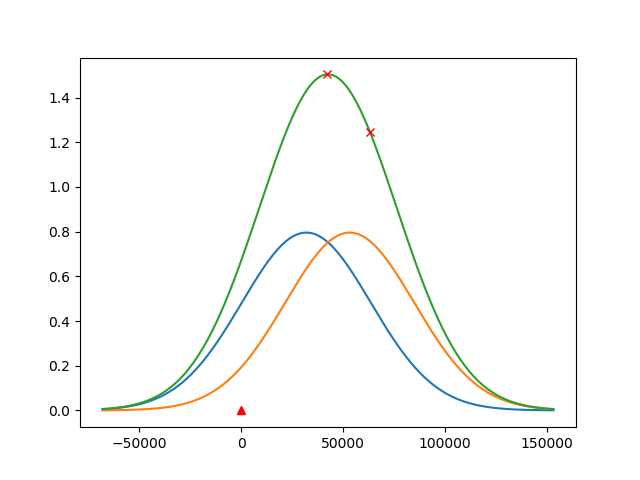

113.36588856307199


In [621]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for i in range(2):
    for k in range(2):
        mass = q[k] * f(x_points, 0, s_sqr, x_bar[i], 0)
    masses.append(mass)
plt.plot(x_points, masses[0])
plt.plot(x_points, masses[1])

mass_tot = masses[0] + masses[1]

print(sum(mass_tot))
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()


In [622]:
q_inv = np.linalg.solve(a, m)
res = abs(q - q_inv)
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])

,Height,Input Mass,Inverted Mass,Residual
0,15000.0,5.000000e+09,5.000000e+09,0.000002
1,25000.0,5.000000e+09,5.000000e+09,0.000002


### Test 4

Four release points at $z_k$ = $[10, 15, 20, 25]$ km

With $q_k$ = $[2.5e9, 2.5e9, 2.5e9, 2.5e9]$ kg

Four sampling points at $x_i = \bar{x_i}$

In [526]:
z = [10000, 15000,20000,25000]
q = [2.5e9, 2.5e9, 2.5e9, 2.5e9]

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[21276.59574468085, 31914.893617021276, 42553.1914893617, 53191.48936170212]


In [527]:
x = x_bar
print(x)
n = len(x)
p = len(x_bar)
a = np.zeros((n,p))
for i in range(n):
    for k in range(p):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[21276.59574468085, 31914.893617021276, 42553.1914893617, 53191.48936170212]
[[1.59154943e-10 1.50398964e-10 1.26916761e-10 9.56406554e-11]
 [1.50398964e-10 1.59154943e-10 1.50398964e-10 1.26916761e-10]
 [1.26916761e-10 1.50398964e-10 1.59154943e-10 1.50398964e-10]
 [9.56406554e-11 1.26916761e-10 1.50398964e-10 1.59154943e-10]]
[1.33027831 1.46717408 1.46717408 1.33027831]


<IPython.core.display.Javascript object>


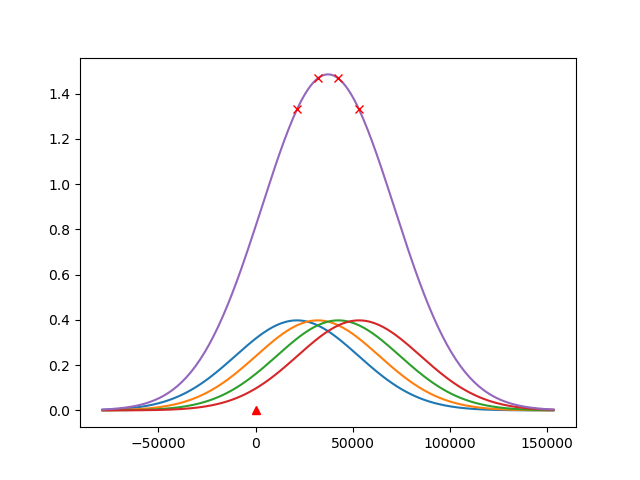

108.19620887721818


In [528]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for k in range(p):
    mass = q[k] * f(x_points, 0, s_sqr, x_bar[k], 0)
    masses.append(mass)
mass_tot = 0
for k in range(p):
    plt.plot(x_points, masses[k])
    mass_tot += masses[k]

print(sum(mass_tot))
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [530]:
q_inv = np.linalg.solve(a, m)
res = abs(q - q_inv)
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])

,Input Mass,Inverted Mass,Residual
0,2.500000e+09,2.500000e+09,0.000059
1,2.500000e+09,2.500000e+09,0.000131
2,2.500000e+09,2.500000e+09,0.000104
3,2.500000e+09,2.500000e+09,0.000029


### Test 5

Four release points at $z_k$ = $[10, 15, 20, 25]$ km

With $q_k$ = $[1.5e9, 3.5e9, 3.5e9, 1.5e9]$ kg

Four sampling points at $x_i = \bar{x_i}$

In [531]:
z = [10000, 15000,20000,25000]
q = [1.5e9, 3.5e9, 3.5e9, 1.5e9]

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[21276.59574468085, 31914.893617021276, 42553.1914893617, 53191.48936170212]


In [532]:
x = x_bar
print(x)
n = len(x)
p = len(x_bar)
a = np.zeros((n,p))
for i in range(n):
    for k in range(p):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[21276.59574468085, 31914.893617021276, 42553.1914893617, 53191.48936170212]
[[1.59154943e-10 1.50398964e-10 1.26916761e-10 9.56406554e-11]
 [1.50398964e-10 1.59154943e-10 1.50398964e-10 1.26916761e-10]
 [1.26916761e-10 1.50398964e-10 1.59154943e-10 1.50398964e-10]
 [9.56406554e-11 1.26916761e-10 1.50398964e-10 1.59154943e-10]]
[1.35279844 1.49941226 1.49941226 1.35279844]


<IPython.core.display.Javascript object>


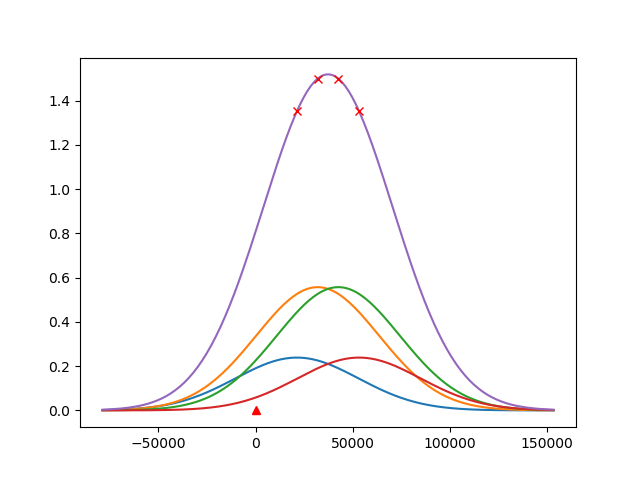

108.20642650933053


In [533]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for k in range(p):
    mass = q[k] * f(x_points, 0, s_sqr, x_bar[k], 0)
    masses.append(mass)
    
mass_tot = 0
for k in range(p):
    plt.plot(x_points, masses[k])
    mass_tot += masses[k]

print(sum(mass_tot))
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [535]:
q_inv = np.linalg.solve(a, m)
res = abs(q - q_inv)
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])

,Input Mass,Inverted Mass,Residual
0,1.500000e+09,1.500000e+09,0.000237
1,3.500000e+09,3.500000e+09,0.000601
2,3.500000e+09,3.500000e+09,0.000564
3,1.500000e+09,1.500000e+09,0.000195


### Test 6

Four release points at $z_k$ = $[10, 15, 20, 25]$ km

With $q_k$ = $[1.5e9, 3.5e9, 3.5e9, 1.5e9]$ kg

Four sampling points at $x_i = \bar{x_i} + \delta$ where $\delta \sim N(\bar{x_i}, 5000)$

In [584]:
z = [10000, 15000,20000,25000]
q = [1.5e9, 3.5e9, 3.5e9, 1.5e9]

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[21276.59574468085, 31914.893617021276, 42553.1914893617, 53191.48936170212]


In [585]:
x = [np.random.normal(xb, 5000) for xb in x_bar]
print(x)
n = len(x)
p = len(x_bar)
a = np.zeros((n,p))
for i in range(n):
    for k in range(p):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[27381.348092282213, 37966.626108489596, 47127.12792225559, 52719.82231822454]
[[1.56216710e-10 1.57527760e-10 1.41852218e-10 1.14068200e-10]
 [1.38462517e-10 1.56267062e-10 1.57489678e-10 1.41737957e-10]
 [1.13949254e-10 1.41765201e-10 1.57498788e-10 1.56255107e-10]
 [9.70804449e-11 1.28182584e-10 1.51138710e-10 1.59137240e-10]]
[1.45325729 1.5184493  1.4527305  1.36195105]


<IPython.core.display.Javascript object>


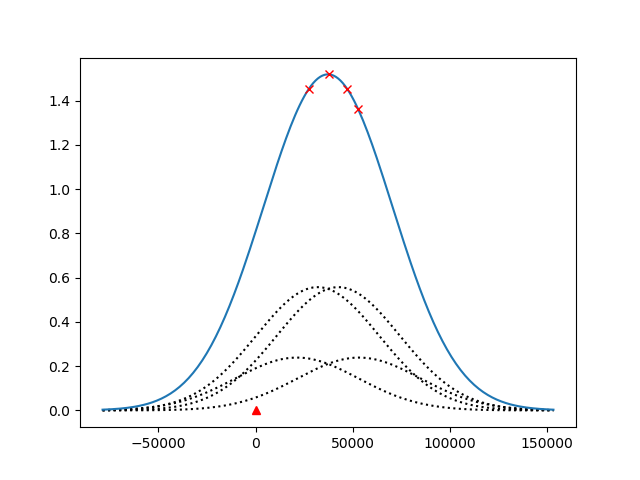

108.20642650933053


In [586]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for k in range(p):
    mass = q[k] * f(x_points, 0, s_sqr, x_bar[k], 0)
    masses.append(mass)
    
mass_tot = 0
for k in range(p):
    plt.plot(x_points, masses[k], "k:")
    mass_tot += masses[k]

print(sum(mass_tot))
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

In [557]:
q_inv = np.linalg.solve(a, m)
res = abs(q - q_inv)
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])

,Input Mass,Inverted Mass,Residual
0,1.500000e+09,1.500000e+09,0.000167
1,3.500000e+09,3.500000e+09,0.000434
2,3.500000e+09,3.500000e+09,0.000418
3,1.500000e+09,1.500000e+09,0.000149


### Test 6

Eleven release points at $z_k \in [10, 20]$ km

With $q_k$ = $1e9$ kg at each level. 

Eleven sampling points at $x_i = \bar{x_i}$

In [659]:
z = np.linspace(10000, 20000, 11)
print(z)

q = [1e9]*11

x_bar = [landing_point(0, zk, u, v) for zk in z]
print(x_bar)

[10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000.]
[21276.59574468085, 23404.255319148935, 25531.91489361702, 27659.574468085106, 29787.23404255319, 31914.893617021276, 34042.55319148936, 36170.21276595745, 38297.87234042553, 40425.53191489362, 42553.1914893617]


In [660]:
x = x_bar
print(x)
n = len(x)
p = len(x_bar)
a = np.zeros((n,p))
for i in range(n):
    for k in range(p):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
print(a)

m = np.matmul(a, q)
print(m)

[21276.59574468085, 23404.255319148935, 25531.91489361702, 27659.574468085106, 29787.23404255319, 31914.893617021276, 34042.55319148936, 36170.21276595745, 38297.87234042553, 40425.53191489362, 42553.1914893617]
[[1.59154943e-10 1.58795108e-10 1.57720478e-10 1.55945565e-10
  1.53494192e-10 1.50398964e-10 1.46700542e-10 1.42446758e-10
  1.37691584e-10 1.32493996e-10 1.26916761e-10]
 [1.58795108e-10 1.59154943e-10 1.58795108e-10 1.57720478e-10
  1.55945565e-10 1.53494192e-10 1.50398964e-10 1.46700542e-10
  1.42446758e-10 1.37691584e-10 1.32493996e-10]
 [1.57720478e-10 1.58795108e-10 1.59154943e-10 1.58795108e-10
  1.57720478e-10 1.55945565e-10 1.53494192e-10 1.50398964e-10
  1.46700542e-10 1.42446758e-10 1.37691584e-10]
 [1.55945565e-10 1.57720478e-10 1.58795108e-10 1.59154943e-10
  1.58795108e-10 1.57720478e-10 1.55945565e-10 1.53494192e-10
  1.50398964e-10 1.46700542e-10 1.42446758e-10]
 [1.53494192e-10 1.55945565e-10 1.57720478e-10 1.58795108e-10
  1.59154943e-10 1.58795108e-10 1.5772

<IPython.core.display.Javascript object>


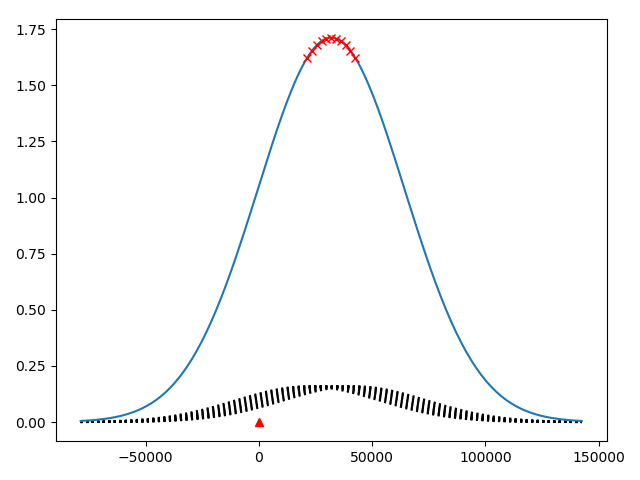

124.72966137201179


In [661]:
x_points = np.linspace(x_bar[0] - 100000, x_bar[-1] + 100000, 200)
plt.figure()
masses = []
for k in range(p):
    mass = q[k] * f(x_points, 0, s_sqr, x_bar[k], 0)
    masses.append(mass)
    
mass_tot = 0
for k in range(p):
    plt.plot(x_points, masses[k], "k:")
    mass_tot += masses[k]

print(sum(mass_tot))
plt.plot(x_points, mass_tot)
# plt.plot(x_bar, m, 'go')
plt.plot(x, m, 'rx')
plt.plot(0, 0, 'r^')
plt.show()

,Height,Input Mass,Inverted Mass,Residual
0,10000.0,1.000000e+09,1.000000e+09,34.805838
1,12000.0,1.000000e+09,1.000000e+09,-168.180788
2,14000.0,1.000000e+09,9.999997e+08,330.899122
3,16000.0,1.000000e+09,1.000000e+09,-331.374871
4,18000.0,1.000000e+09,9.999998e+08,168.907157
5,20000.0,1.000000e+09,1.000000e+09,-35.056687


<IPython.core.display.Javascript object>


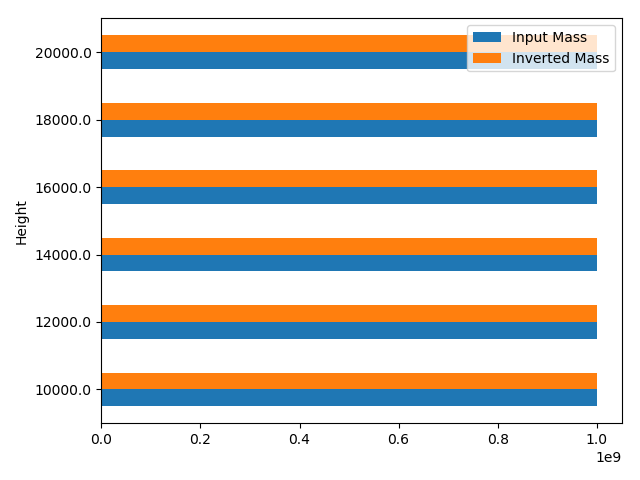

<IPython.core.display.Javascript object>


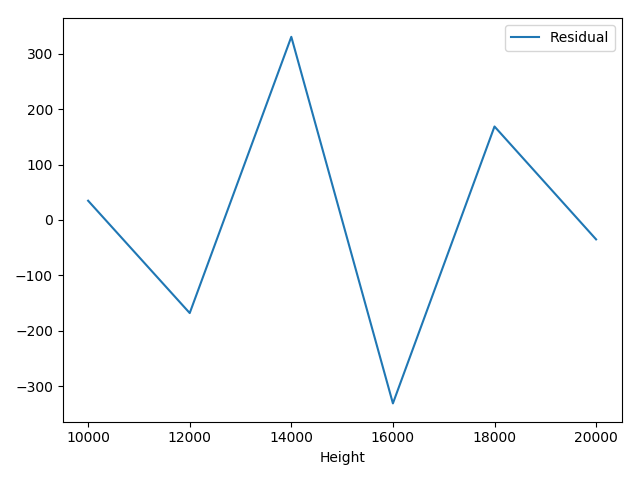

In [692]:
q_inv = np.linalg.solve(a, m)
res = q - q_inv
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
df = pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])
display(df)

ax = df.plot.barh(x="Height", y=['Input Mass', 'Inverted Mass'], rot=0)
plt.tight_layout()
df.plot(x="Height", y=['Residual'], rot=0)
plt.tight_layout()

### Test 7

Six release points at $z_k \in [10, 20]$ km

With $q_k$ = $1e9$ kg at each level. 

Six sampling points at $x_i = \bar{x_i}$

In [705]:
p = 9

z = np.linspace(10000, 20000, p)

q = [1e9]*p

x_bar = [landing_point(0, zk, u, v) for zk in z]

table = np.asarray([z, np.asarray(q), np.asarray(x_bar)]).T
display(pd.DataFrame(table,  columns=["Release Heights (z)", "Suspended Masses (q)", "Landing Points (x_bar)"]))

,Release Heights (z),Suspended Masses (q),Landing Points (x_bar)
0,10000.0,1.000000e+09,21276.595745
1,11250.0,1.000000e+09,23936.170213
2,12500.0,1.000000e+09,26595.744681
3,13750.0,1.000000e+09,29255.319149
4,15000.0,1.000000e+09,31914.893617
5,16250.0,1.000000e+09,34574.468085
6,17500.0,1.000000e+09,37234.042553
7,18750.0,1.000000e+09,39893.617021
8,20000.0,1.000000e+09,42553.191489


In [706]:
x = x_bar
display(pd.DataFrame(x, columns=["Sampling Points"]))
n = len(x)
p = len(x_bar)
a = np.zeros((n,p))
for i in range(n):
    for k in range(p):
        a[i,k] = f(x[i], 0, s_sqr, x_bar[k], 0)
display(pd.DataFrame(a))
m = np.matmul(a, q)
display(pd.DataFrame(m, columns=["Mass"]))

,Sampling Points
0,21276.595745
1,23936.170213
2,26595.744681
3,29255.319149
4,31914.893617
5,34574.468085
6,37234.042553
7,39893.617021
8,42553.191489


,0,1,2,3,4,5,6,7,8
0,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10,1.503990e-10,1.456871e-10,1.401283e-10,1.338315e-10,1.269168e-10
1,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10,1.503990e-10,1.456871e-10,1.401283e-10,1.338315e-10
2,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10,1.503990e-10,1.456871e-10,1.401283e-10
3,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10,1.503990e-10,1.456871e-10
4,1.503990e-10,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10,1.503990e-10
5,1.456871e-10,1.503990e-10,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10,1.541688e-10
6,1.401283e-10,1.456871e-10,1.503990e-10,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10,1.569193e-10
7,1.338315e-10,1.401283e-10,1.456871e-10,1.503990e-10,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10,1.585931e-10
8,1.269168e-10,1.338315e-10,1.401283e-10,1.456871e-10,1.503990e-10,1.541688e-10,1.569193e-10,1.585931e-10,1.591549e-10


,Mass
0,1.325799
1,1.357475
2,1.380563
3,1.394603
4,1.399315
5,1.394603
6,1.380563
7,1.357475
8,1.325799


,Height,Input Mass,Inverted Mass,Residual
0,10000.0,1.000000e+09,1.034813e+09,-3.481269e+07
1,11250.0,1.000000e+09,7.301186e+08,2.698814e+08
2,12500.0,1.000000e+09,1.921717e+09,-9.217171e+08
3,13750.0,1.000000e+09,-8.113196e+08,1.811320e+09
4,15000.0,1.000000e+09,3.240180e+09,-2.240180e+09
5,16250.0,1.000000e+09,-7.855040e+08,1.785504e+09
6,17500.0,1.000000e+09,1.895629e+09,-8.956293e+08
7,18750.0,1.000000e+09,7.414962e+08,2.585038e+08
8,20000.0,1.000000e+09,1.032869e+09,-3.286943e+07


<IPython.core.display.Javascript object>


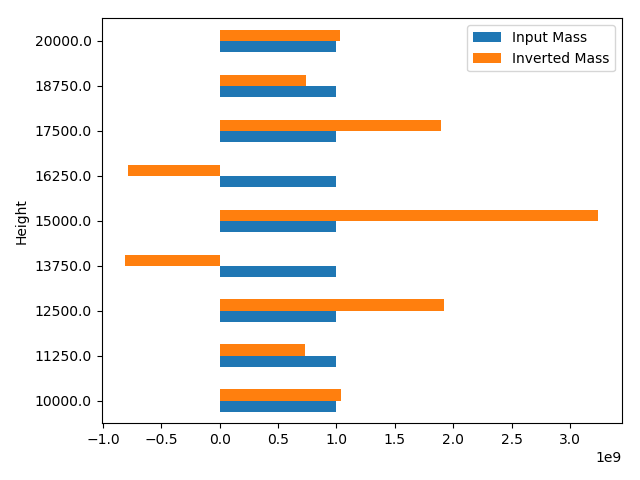

<IPython.core.display.Javascript object>


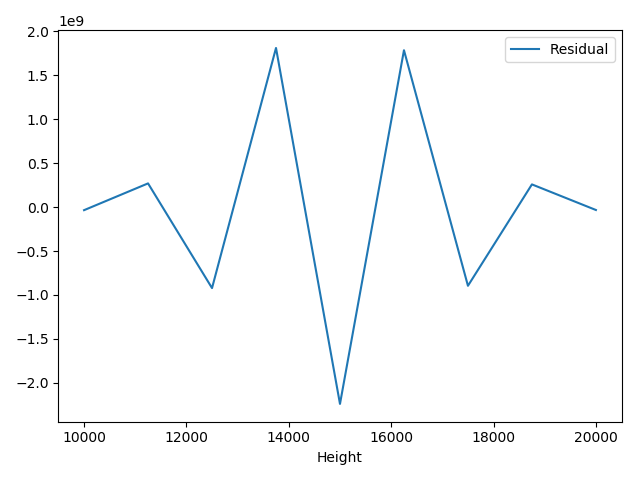

In [707]:
q_inv = np.linalg.solve(a, m)
res = q - q_inv
data = np.asarray([np.asarray(z), np.asarray(q), q_inv, res])
df = pd.DataFrame(data.T, columns=["Height", "Input Mass", "Inverted Mass", "Residual"])
display(df)

ax = df.plot.barh(x="Height", y=['Input Mass', 'Inverted Mass'], rot=0)
plt.tight_layout()
df.plot(x="Height", y=['Residual'], rot=0)
plt.tight_layout()